In [4]:
import os
#获取目标文件夹的路径
filedir ='C:/Users/pc/degree project/20210225_Data/SyMSpaceProjects/MopFiles'
#获取当前文件夹中的文件名称列表  
filenames=os.listdir(filedir)
#打开当前目录下的result.json文件，如果没有则创建
f=open('results2.json','w')
#先遍历文件名`在这里插入代码片`
for filename in filenames:
    filepath = filedir+'/'+filename
    #遍历单个文件，读取行数
    for line in open(filepath):
        f.writelines(line)
        f.write('\n')
#关闭文件
f.close()



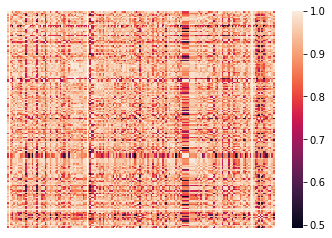

In [2]:
import os
import glob
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder = 'SyMSpaceProjects/MopFiles' 

use_all_files = True # choose to select all or just the sample files

if use_all_files:
    files = glob.glob(os.path.join(folder, '*.json'))
    #print(files)
else:
    json_files = ['MopFile_3.json', 'MopFile_5.json', 'MopFile_6.json', 'MopFile_7.json']


d_labels = dict()
all_webpaths = []

for file in files:
    key = os.path.basename(file)

    with open(file, 'r') as fh:
        content = json.load(fh)
        actual_webpaths = []
        for wp in content['webpaths']:
            '''remove strange entries'''
            for root in ['Electronics', 'KnowledgeEngines', 'Manufacturing', 'Material', 'Part', 'Simulation']:
                if wp.startswith(root):
                    actual_webpaths.append(wp)
                    break
        d_labels[key] = actual_webpaths
        all_webpaths.extend(actual_webpaths)

unique_wps = sorted(set(all_webpaths))

wp_map = dict()
for i, main_wp in enumerate(unique_wps):
    wp_map[main_wp] = i

data_labels = dict()

for main_wp in unique_wps:
    data_labels[main_wp] = []
    for file_key, webpaths in d_labels.items():
        if main_wp in webpaths:
            webpaths = list(set(webpaths))
            # webpaths.remove(main_wp)
            data_labels[main_wp].extend(webpaths)
    data_labels[main_wp] = sorted(set(data_labels[main_wp]))

data_numbers = dict()
for main_wp in unique_wps:
    data_numbers[main_wp] = [wp_map[wp] for wp in data_labels[main_wp]]

data = data_numbers
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

# taking all rows but only some columns
# df = df.iloc[:,:30]

correlation_mat = df.corr()

'''plot the correlation matrix'''
if use_all_files:
    '''plot without labels'''
    sns.heatmap(correlation_mat, annot=False, xticklabels=False, yticklabels=False)
else:
    '''normal plot'''
    sns.heatmap(correlation_mat, annot=True)

plt.show()

In [1]:
from pandas import json_normalize
import json
import pandas as pd

file = open("results2.json", "r")
text = file.read()
text = json.loads(text)
#print(json_normalize(text, 'webpaths'))

frame = pd.json_normalize(text, 'webpaths','file')
#pd.set_option('max_colwidth',100)
#print(frame.iloc[[0],[0]])

frame.columns = ['component','user']
data = frame.drop(['user'], axis=1)
data.drop_duplicates(['component'],keep='first',inplace=True)


actual_webpaths = []
for wp in data['component']:
    '''remove strange entries'''
    for root in ['Electronics', 'KnowledgeEngines', 'Manufacturing', 'Material', 'Part', 'Simulation']:
        if wp.startswith(root):
            actual_webpaths.append(wp)
            break

actual_webpaths








['Part_MotorPart_StatorExterior_FreeCAD_Stator_Exterior2_FreeCAD',
 'Material_MaterialFunctions_SteelStacking',
 'KnowledgeEngines_Magnetics_Winding_Winding',
 'Part_MotorPart_RotorPMExterior_FreeCAD_Rotor_Exterior4b_FreeCAD',
 'Material_MaterialFunctions_MagnetGap',
 'Simulation_Motor_Magnetic_PMSM_Exterior_FEMM_V2',
 'KnowledgeEngines_DataImportExport_ExcelLink',
 'KnowledgeEngines_Mechanics_RotorStressCalc',
 'Simulation_Motor_Magnetic_PMSM_Interior_FEMM_V2',
 'Material_Metal_MagneticAlloy_NdFeB_BMN-40EH_Bomatec',
 'Material_InsulationMaterial_InsulationPaper_Nomex410-38',
 'Part_MotorPart_StatorInterior_FreeCAD_Stator_Interior2_FreeCAD',
 'Part_MotorPart_RotorPMInterior_FreeCAD_Rotor_Interior10_FreeCAD',
 'Simulation_Motor_Magnetic_Bearingless_Motor_Femm_Simulate_BLMotor',
 'Part_MotorPart_RotorPMInterior_FreeCAD_Rotor_Interior14_FreeCAD',
 'Part_MotorPart_RotorPMInterior_FreeCAD_Rotor_Interior14b_FreeCAD',
 'Part_MotorPart_StatorInterior_Creo_Stator_Interior11_Creo',
 'Part_MotorP

In [2]:
import os
filePath = 'C:/Users/pc/degree project/20210225_Data/ComponentSpace/Components'
non_userfile = os.listdir(filePath)
actual_non_webpaths = []

for wp in non_userfile:
    '''remove .json'''
    for root in ['.json']:
        if wp.endswith(root):
            temp = wp.split(".")
            temp = temp[0]
            actual_non_webpaths.append(temp)
            break

actual_non_webpaths

['AutomationControl_ARSimCoupler',
 'Electronics_Control_Controller_X2C',
 'Electronics_Control_PMSM_FOC_Controller_Parameters',
 'Electronics_Control_X2CModelParameterScript',
 'Electronics_PowerElectronics_Inverter_SKAI2_HV_X2C',
 'Electronics_PowerElectronics_PowerBox30A_LCM',
 'KnowledgeEngines_CAD_NXInterface',
 'KnowledgeEngines_DataImportExport_AUPulse_Analyzer',
 'KnowledgeEngines_DataImportExport_ExcelLink',
 'KnowledgeEngines_DataImportExport_ExportMatlabParameters',
 'KnowledgeEngines_DataImportExport_ReadDataFromCSV',
 'KnowledgeEngines_DataImportExport_ReadDataFromExcel',
 'KnowledgeEngines_DataImportExport_StoreDataToCSV',
 'KnowledgeEngines_DataImportExport_StoreDataToPickle',
 'KnowledgeEngines_DataImportExport_UFFImport',
 'KnowledgeEngines_DataImportExport_Uff_PVD_To_Txt',
 'KnowledgeEngines_Electronics_StateSpaceToLTspice',
 'KnowledgeEngines_FluidMechanics_HagenPoiseuille',
 'KnowledgeEngines_FluidMechanics_HeatTransferPipe',
 'KnowledgeEngines_Geometry_compare2DTra

In [3]:
count = 0
appear_component = {}

for webpaths in actual_webpaths:
    for non_webpaths in actual_non_webpaths:
        if webpaths == non_webpaths:
            count = count + 1
            if webpaths in appear_component:
                appear_component[webpaths] = appear_component[webpaths] + 1
            else:
                appear_component[webpaths] = 1

appear_component

{'Part_MotorPart_StatorExterior_FreeCAD_Stator_Exterior2_FreeCAD': 1,
 'Material_MaterialFunctions_SteelStacking': 1,
 'Material_MaterialFunctions_MagnetGap': 1,
 'Simulation_Motor_Magnetic_PMSM_Exterior_FEMM_V2': 1,
 'KnowledgeEngines_DataImportExport_ExcelLink': 1,
 'KnowledgeEngines_Mechanics_RotorStressCalc': 1,
 'Simulation_Motor_Magnetic_PMSM_Interior_FEMM_V2': 1,
 'Material_Metal_MagneticAlloy_NdFeB_BMN-40EH_Bomatec': 1,
 'Material_InsulationMaterial_InsulationPaper_Nomex410-38': 1,
 'Part_MotorPart_StatorInterior_FreeCAD_Stator_Interior2_FreeCAD': 1,
 'Part_MotorPart_RotorPMInterior_FreeCAD_Rotor_Interior10_FreeCAD': 1,
 'Simulation_Motor_Magnetic_Bearingless_Motor_Femm_Simulate_BLMotor': 1,
 'Part_MotorPart_RotorPMInterior_FreeCAD_Rotor_Interior14_FreeCAD': 1,
 'Part_MotorPart_StatorInterior_Creo_Stator_Interior11_Creo': 1,
 'Part_MotorPart_RotorSEInterior_Creo_Rotor_Interior44_Creo': 1,
 'Simulation_Motor_Magnetic_SESM_RBF_SESM_Loadpoint_Generator_Voltage_RBF': 1,
 'Simulatio

In [4]:
count

123